<a href="https://colab.research.google.com/github/sraghu678/Titanic-survival-prediction/blob/master/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Data analysing and visualising libraray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load the data
titanic = sns.load_dataset('titanic')
#read the dataset
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#count the rows and columns
titanic.shape

(891, 15)

In [ ]:
#Characterize the information in dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#checking the survived people
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

# New Section

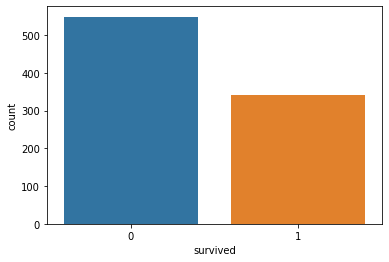

In [ ]:
#draw a plot of survival
sns.countplot(titanic['survived'])

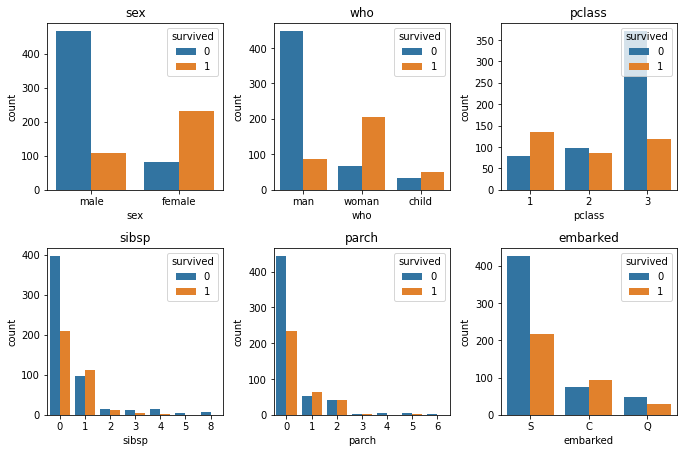

In [ ]:
#visualizing different category of columns
col = ['sex', 'who', 'pclass', 'sibsp',	'parch',	'embarked']
n_rows = 2
n_cols = 3

#the subplot of grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2) )

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    ax = axs[r][c]
    sns.countplot(titanic[col[i]] , hue = titanic['survived'], ax=ax)
    ax.set_title(col[i])
    ax.legend(title ='survived', loc = 'upper right')

plt.tight_layout()



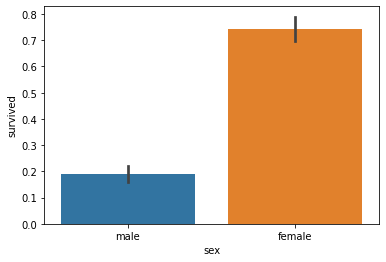

In [ ]:
#draw a bar plot of survival by sex
sns.barplot(x="sex", y="survived", data=titanic)

In [ ]:
#survival rate by sex and class
titanic.pivot_table('survived', index = 'sex', columns= 'pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


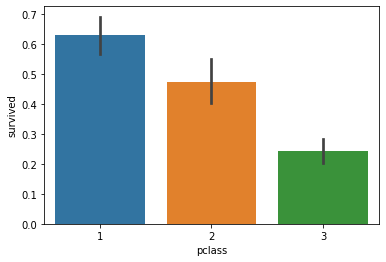

In [ ]:
#draw a bar plot of survival by sex and class
sns.barplot(x='pclass', y='survived', data=titanic)

In [ ]:
#survival by sex, class, and age
age = pd.cut(titanic['age'], [0,20,80])
titanic.pivot_table('survived', ['sex' , 'pclass', age] )


survived
sex    pclass age               
female 1      (0, 20]   0.928571
              (20, 80]  0.971831
       2      (0, 20]   1.000000
              (20, 80]  0.896552
       3      (0, 20]   0.510638
              (20, 80]  0.418182
male   1      (0, 20]   0.571429
              (20, 80]  0.382979
       2      (0, 20]   0.526316
              (20, 80]  0.062500
       3      (0, 20]   0.197368
              (20, 80]  0.129944

In [ ]:
#survival based on fare
fare = pd.cut(titanic['fare'], [0,50,100,200,300,400,500,600])
titanic.pivot_table('survived', [fare] )

,survived
fare,
"(0, 50]",0.324022
"(50, 100]",0.654206
"(100, 200]",0.757576
"(200, 300]",0.647059
"(500, 600]",1.000000


In [ ]:
#look up all the value get count
for val in titanic:
  print(titanic[val].value_counts())
  print()


0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

**Here alive, deck, embarked_town, who, class have no use**

In [ ]:
#Drop the column
titanic = titanic.drop(['alive', 'deck', 'embark_town', 'who', 'class', 'alone', 'adult_male'], axis = 1)
#removing the missing values
titanic = titanic.dropna(subset= ['embarked', 'age'])

In [ ]:
titanic.shape

(712, 8)

In [ ]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
#print the unique value in columns

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode the sex column
titanic.iloc[:, 2] =labelencoder.fit_transform(titanic.iloc[:, 2].values )

#encode the embarked column
titanic.iloc[:, 7] =labelencoder.fit_transform(titanic.iloc[:, 7].values )


In [ ]:
#print the unique value in columns

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
#split the data
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [ ]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size = 0.2, random_state = 0)

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#testing different models
def models(X_train, Y_train):
  #use logistic regression
  from sklearn.linear_model import LogisticRegression

  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #use Kneighbors
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
  knn.fit(X_train, Y_train)

  # Linear SVC
  from sklearn.svm import LinearSVC

  linear_svc = LinearSVC()
  linear_svc.fit(X_train, Y_train)
  #decision tree classifier
  from sklearn.tree import DecisionTreeClassifier

  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Gaussian Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  from sklearn.metrics import accuracy_score

  gauss = GaussianNB()
  gauss.fit(X_train, Y_train) 

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier

  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  #print the accuracy for each model
  print(log.score(X_train, Y_train))
  print(knn.score(X_train, Y_train))
  print(linear_svc.score(X_train, Y_train))
  print(tree.score(X_train, Y_train))
  print(gauss.score(X_train, Y_train))
  print(forest.score(X_train, Y_train))

  return log, knn, linear_svc, tree, gauss, forest
   

In [ ]:
#get and train all of the model
model = models(X_train, Y_train)


0.7978910369068541
0.8664323374340949
0.7943760984182777
0.9929701230228472
0.8031634446397188
0.9753954305799648


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#show the confusion matrix and test data accuracy

from sklearn.metrics import confusion_matrix
for i in range( len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  #extract TN, FN, TP, FP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  test_score = (TN+TP)/(TP+TN+FN+FP)
  print(cm)
  print ('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[75  7 19 42]
Model[0] Testing Accuracy = "0.8181818181818182"

[67 15 20 41]
Model[1] Testing Accuracy = "0.7552447552447552"

[73  9 18 43]
Model[2] Testing Accuracy = "0.8111888111888111"

[54 28 12 49]
Model[3] Testing Accuracy = "0.7202797202797203"

[69 13 27 34]
Model[4] Testing Accuracy = "0.7202797202797203"

[73  9 14 47]
Model[5] Testing Accuracy = "0.8391608391608392"



**Here We find highest accuracy of our by Random Forest Classifier which is 83% on our testing dataset**

In [ ]:
#print the prediction of random forest classifier
pred = model[5].predict(X_test)
print(pred)
print()

#print the tested value
print(Y_test)


[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
#finding survival of user defined value

survival = [[1, 0, 25, 6, 8, 0, 1 ]]

#scaling survial
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
survival_scaled = sc.fit_transform(survival)

#print the survival by random forest classifier
pred = model[5].predict(survival_scaled)
print(pred)

if pred == 0:
  print('you can not survive')
else:
  print('you can survive')


[0]
you can not survive


**Hence the conclusion is that female who sit in 1st and 2'nd has more survival chance**